In [44]:
%matplotlib inline

In [65]:
import numpy as np
import pandas as pd
import os
import sys
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [46]:
#Import Data
os.chdir('E:\Academics\Research\Data\Experimental data\Compression_test\Results\Input\As_Built')
Master_Data = pd.read_csv('Data_As_Built_New.csv').dropna()
list(Master_Data)

['Name',
 'X',
 'Y',
 'Theta',
 'Phi',
 'Porosity_Fraction',
 'Max_Pore_Diameter',
 'Mean_Pore_Diameter',
 'Median_Pore_Diameter',
 'Median_Pore_Spacing',
 'Yield',
 'Modulus']

In [47]:
# Input and output columns in Dataframe
Input = ['X','Y','Theta','Phi','Porosity_Fraction','Max_Pore_Diameter','Mean_Pore_Diameter','Median_Pore_Diameter','Median_Pore_Spacing']
Properties = ['Yield','Modulus']
Output = Properties[0]

In [48]:
# Normalization of data
full = []
full.extend(Input)
full.extend(Properties)
Parsed_Data = Master_Data[full]
Normalized_Data = (Parsed_Data-Parsed_Data.min())/(Parsed_Data.max()-Parsed_Data.min())
Normalized_Data = Normalized_Data.dropna()

In [49]:
# Name Input and target values
X = Normalized_Data[Input].values
y = Normalized_Data[Output].values

In [50]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
# Applying PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [53]:
explained_variance

array([ 0.3499062 ,  0.1865769 ,  0.12578503,  0.1201842 ,  0.07751067,
        0.06809924,  0.05715811,  0.01200781,  0.00277184])

In [54]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [55]:
# Fit regression model
svr_rbf = SVR(C=0.0263665089873, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=1, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)

In [56]:
svr_rbf.fit(X_train,y_train)

SVR(C=0.0263665089873, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=1, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)

In [57]:
y_predicted = svr_rbf.predict(X_test)

In [58]:
r2_score(y_test,y_predicted)

-0.046494096402712071

In [61]:
mean_squared_error(y_test,y_predicted)

0.065659919015139442

In [62]:
y_test

array([ 0.5375,  0.745 ,  0.9875,  0.8875,  0.8425,  0.575 ,  0.4475,
        0.4775,  0.4175,  0.485 ,  0.385 ,  0.1225,  0.1775])

In [63]:
y_predicted

array([ 0.57689304,  0.54783059,  0.57346259,  0.51811697,  0.56898344,
        0.57412067,  0.58501514,  0.5214583 ,  0.58230032,  0.57009575,
        0.57660046,  0.56856087,  0.55105623])

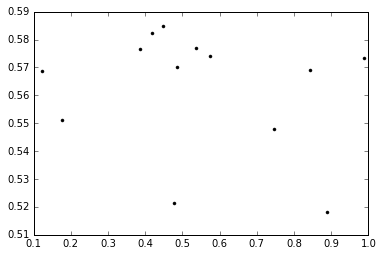

In [66]:
plt.plot(y_test,y_predicted,'k.')